In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
econ=pd.read_csv('datasets\Global Economy Indicators.csv')#,sep='|',encoding='cp1252'
col2=[]
# cleaning the names of the columns
for c in econ.columns:
    col2.append(c.strip())
econ.columns=col2
# cleaning the countries
for i, c in econ['Country'].items():
    econ.iloc[i,1]=c.strip()

In [15]:
prison=pd.read_csv("datasets\incarceration-rates-by-country-2025.csv") 

In [16]:
coll=list(prison.columns)
coll[1]='Country'
prison.columns=coll

In [17]:
#data on freedom index, GNI per capita, GINI index,...
free=pd.read_csv('datasets\\freedom.csv')

In [18]:
#geographic data
geo=pd.read_csv('datasets\dimgeo.csv')

In [19]:
free2=pd.merge(free,geo,on='Country',how='inner')

In [20]:
free3=pd.merge(free2,prison,on='Country',how='inner')

In [11]:
free3

,Unnamed: 0,GNIPerCapita,GNIPerCapitaUSD,CountryID,Imprisonment Rate (per 100K people),Imprisonment,WB Income Group,GINI Index(WB),GINI Index(UNU),Country,...,Geographical subregion,Intermediary region,Continental region,CountryCodeID,flagCode,IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear,IncarcerationRates_TotalIncarceratedPeople_num_MultiYear,IncarcerationRates_FemalePctOfIncarcerated_pct_MultiYear,IncarcerationRates_MalePctOfIncarcerated_pct_MultiYear,IncarcerationRates_TotalIncarceratedDataYear_year_MultiYear
0,0,2390.0,8230.0,IND,NaN,NaN,Lower middle income,32.8,37.06,India,...,Southern Asia,—,Asia,IND,IN,41,573220.0,4.1,95.9,2022.0
1,1,12850.0,21250.0,CHN,NaN,NaN,Upper middle income,35.7,36.67,China,...,Eastern Asia,—,Asia,CHN,CN,119,1690000.0,8.6,91.4,2018.0
2,2,76770.0,77950.0,USA,531.0,1767200.0,High income,41.3,39.79,United States,...,Northern America,North America,Americas,USA,US,541,1808100.0,8.8,91.2,2022.0
3,3,4580.0,14250.0,IDN,NaN,NaN,Upper middle income,36.1,37.92,Indonesia,...,South-eastern Asia,—,Asia,IDN,ID,96,273697.0,4.8,95.2,2024.0
4,4,1560.0,6260.0,PAK,NaN,NaN,Lower middle income,29.6,29.59,Pakistan,...,Southern Asia,—,Asia,PAK,PK,45,108643.0,1.6,98.4,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,187,8430.0,13500.0,DMA,348.0,261.0,NaN,NaN,NaN,Dominica,...,Caribbean,Latin America and the Caribbean North America,Americas,DMA,DM,356,260.0,1.2,98.8,2024.0
156,209,NaN,NaN,GNB,NaN,NaN,Low income,33.4,34.77,Guinea-Bissau,...,Western Africa,Sub-Saharan Africa,Africa,GNB,GW,31,596.0,2.6,97.4,2017.0
157,212,NaN,NaN,SVK,NaN,NaN,High income,24.1,24.12,Slovakia,...,Eastern Europe,—,Europe,SVK,SK,155,8385.0,7.3,92.7,2024.0
158,213,NaN,NaN,TLS,NaN,NaN,Lower middle income,28.7,28.65,Timor-Leste,...,South-eastern Asia,—,Asia,TLS,TL,55,763.0,4.1,95.9,2021.0


In [25]:
pays=['China','India','United States', 'France', 'Switzerland','Germany','Algeria','Morocco','Taiwan','Japan','Sweden','Denmark',
      'Malaysia','South Korea','Poland','Russia','Brazil','Argentina','Columbia','Chile','South Africa','Italy','Spain','Nigeria',
     'Cambodia','Thailand','Indonesia','Iran','Canada','Mexico','Singapour','Hong Kong','Taiwan','Egypt','Liberia','Angola',
     'Slovenia','Albania','Greece','Austria','El Salvador']

ValueError: Could not interpret value `WB Income Group` for parameter `hue`

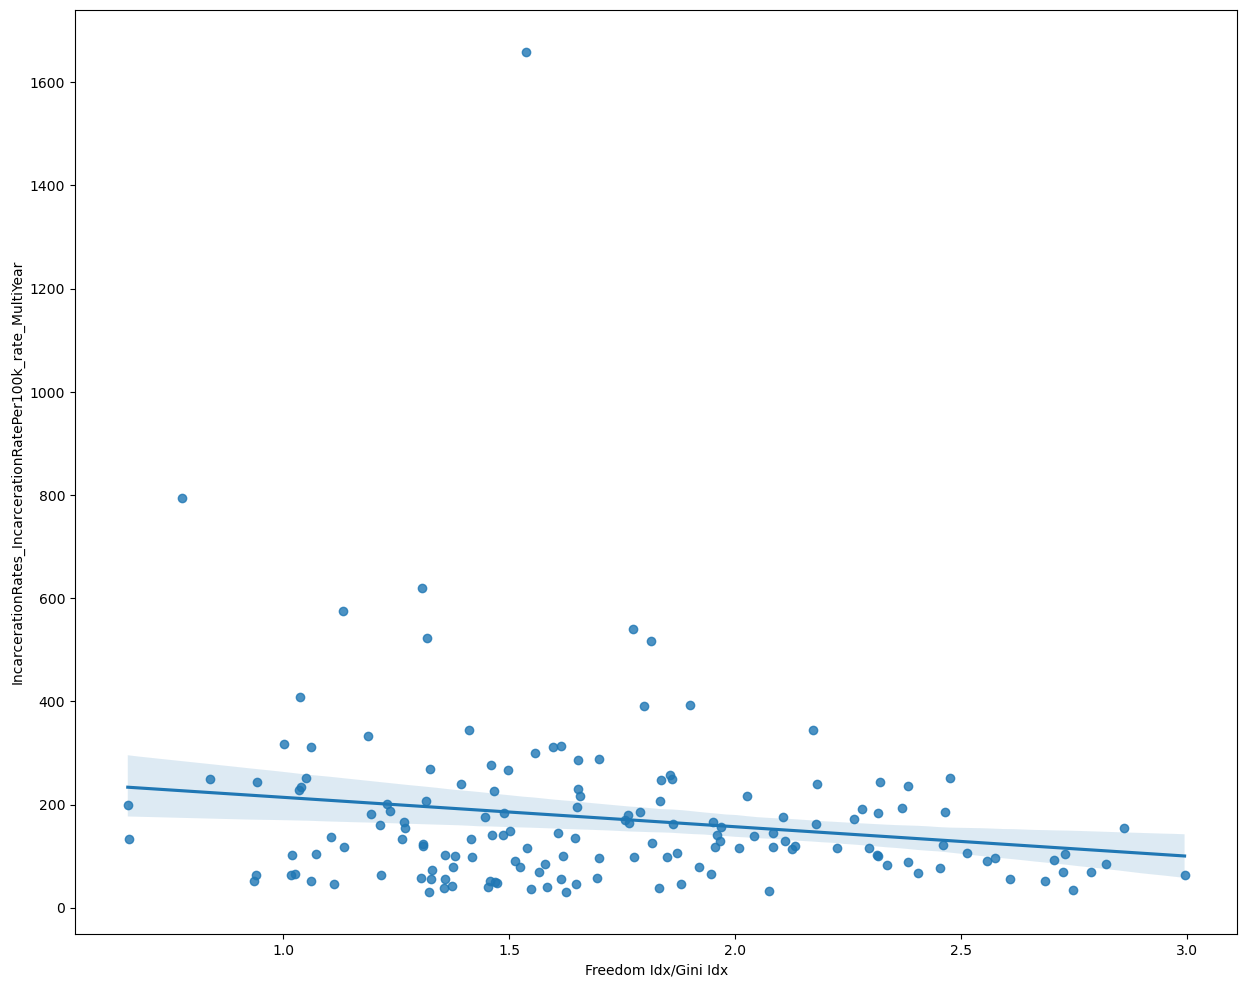

In [21]:
plt.figure(figsize=(15, 12))
sns.regplot(x="Freedom Idx/Gini Idx", y="IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear", data=free3)
sns.scatterplot(data=free3, x='Freedom Idx/Gini Idx', y='IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear',
                hue='WB Income Group', style='WB Income Group',s=100)

for i, row in gini2.iterrows():
    if row['Country'] in pays:  # Annotation uniquement si le label n'est pas vide
        plt.text(row['Freedom Index'] + 0.01, row['GniPerCapitaUSD'], row['Country'], fontsize=12, color='black')

plt.savefig('graphs\\prison+salvador.png',bbox_inches='tight')
#sns.regplot(x="Freedom Idx/Gini Idx", y="Imprisonment Rate (per 100K people)", data=gini);

ValueError: Could not interpret value `WB Income Group` for parameter `hue`

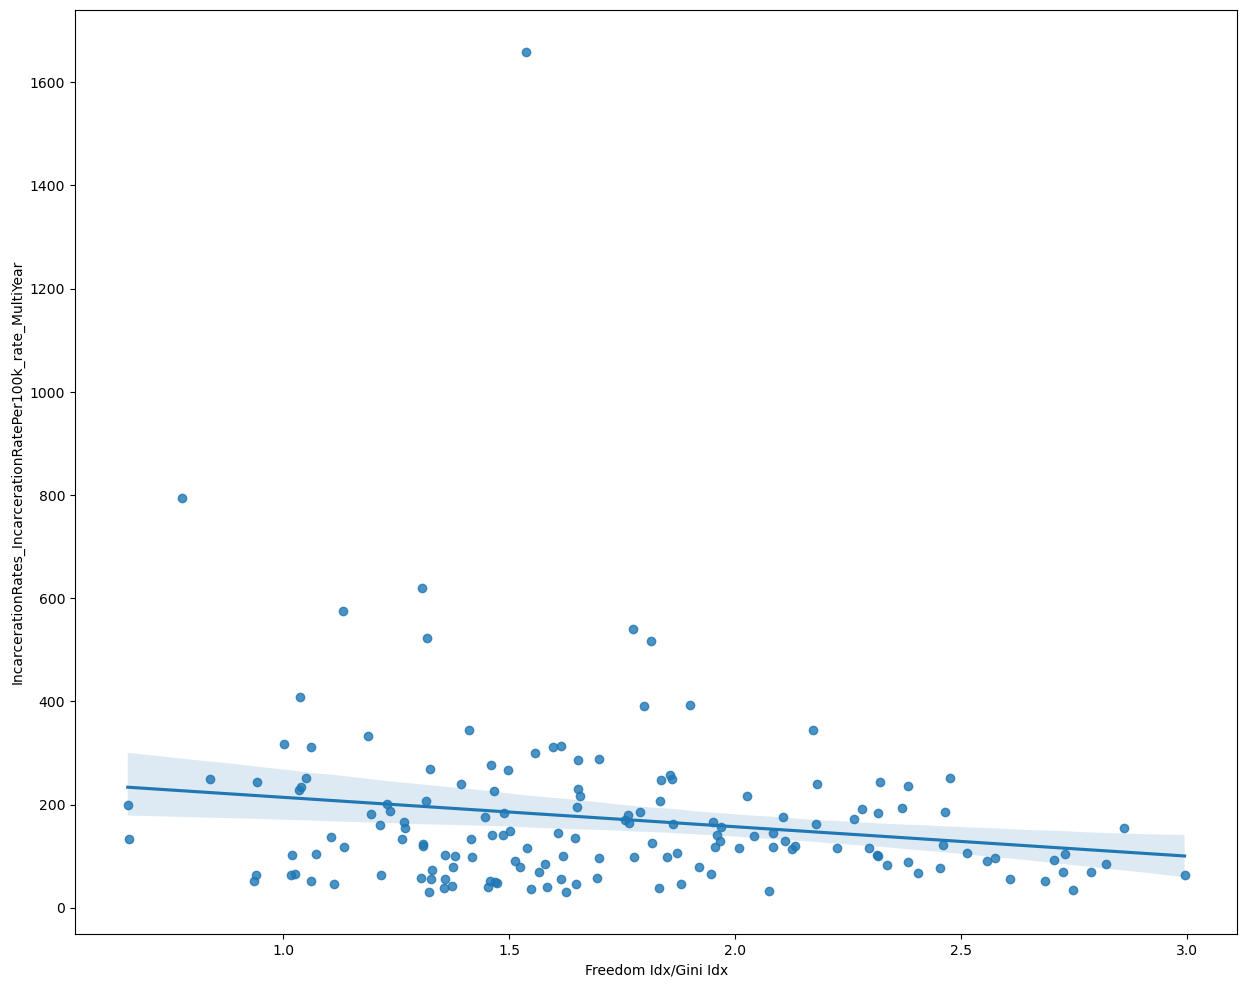

In [26]:
plt.figure(figsize=(15, 12))
sns.regplot(x="Freedom Idx/Gini Idx", y="IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear", data=free3)
sns.scatterplot(data=free3, x='Freedom Idx/Gini Idx', y='IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear',
                hue='WB Income Group', style='WB Income Group',s=100)
plt.ylim(-40,700)

for i, row in gini2.iterrows():
    if row['Country'] in pays:  # Annotation uniquement si le label n'est pas vide
        plt.text(row['Freedom Index'] + 0.01, row['GniPerCapitaUSD'], row['Country'], fontsize=12, color='black')

plt.savefig('graphs\\prison_incomelvl.png',bbox_inches='tight')
#sns.regplot(x="Freedom Idx/Gini Idx", y="Imprisonment Rate (per 100K people)", data=gini);

<Axes: xlabel='Freedom Idx/Gini Idx', ylabel='IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear'>

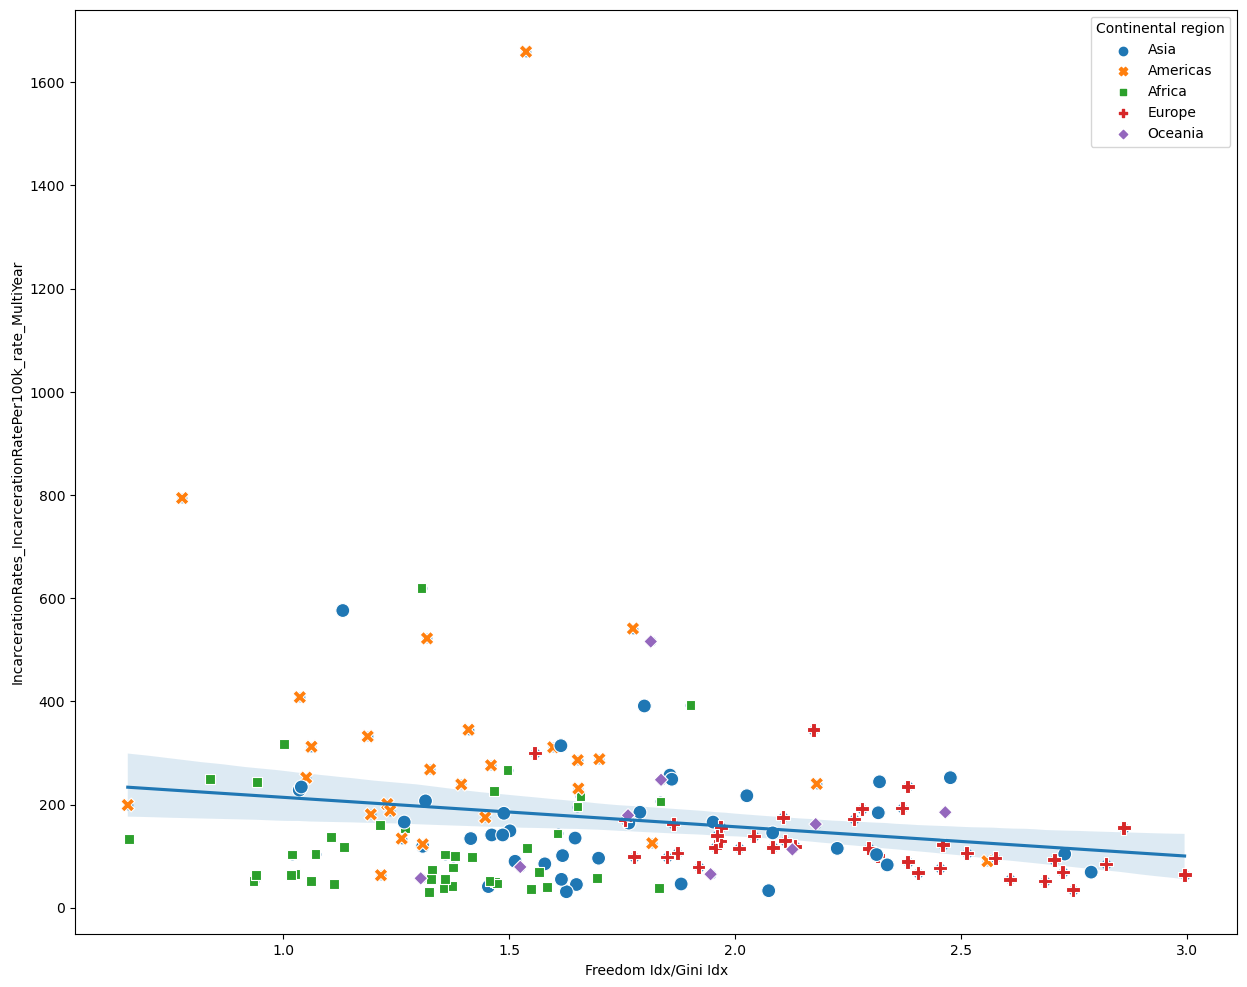

In [22]:
plt.figure(figsize=(15, 12))
ax = plt.gca()

sns.regplot(x="Freedom Idx/Gini Idx", y="IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear", data=free3)
#ax.set_yscale('log')

sns.scatterplot(data=free3, x='Freedom Idx/Gini Idx', y='IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear',
                hue='Continental region', style='Continental region',s=100)
for i, row in gini2.iterrows():
    if row['Country'] in pays:  # Annotation uniquement si le label n'est pas vide
        plt.text(row['Freedom Index'] + 0.01, row['GniPerCapitaUSD'], row['Country'], fontsize=12, color='black')

#sns.regplot(x="Freedom Idx/Gini Idx", y="Imprisonment Rate (per 100K people)", data=gini);

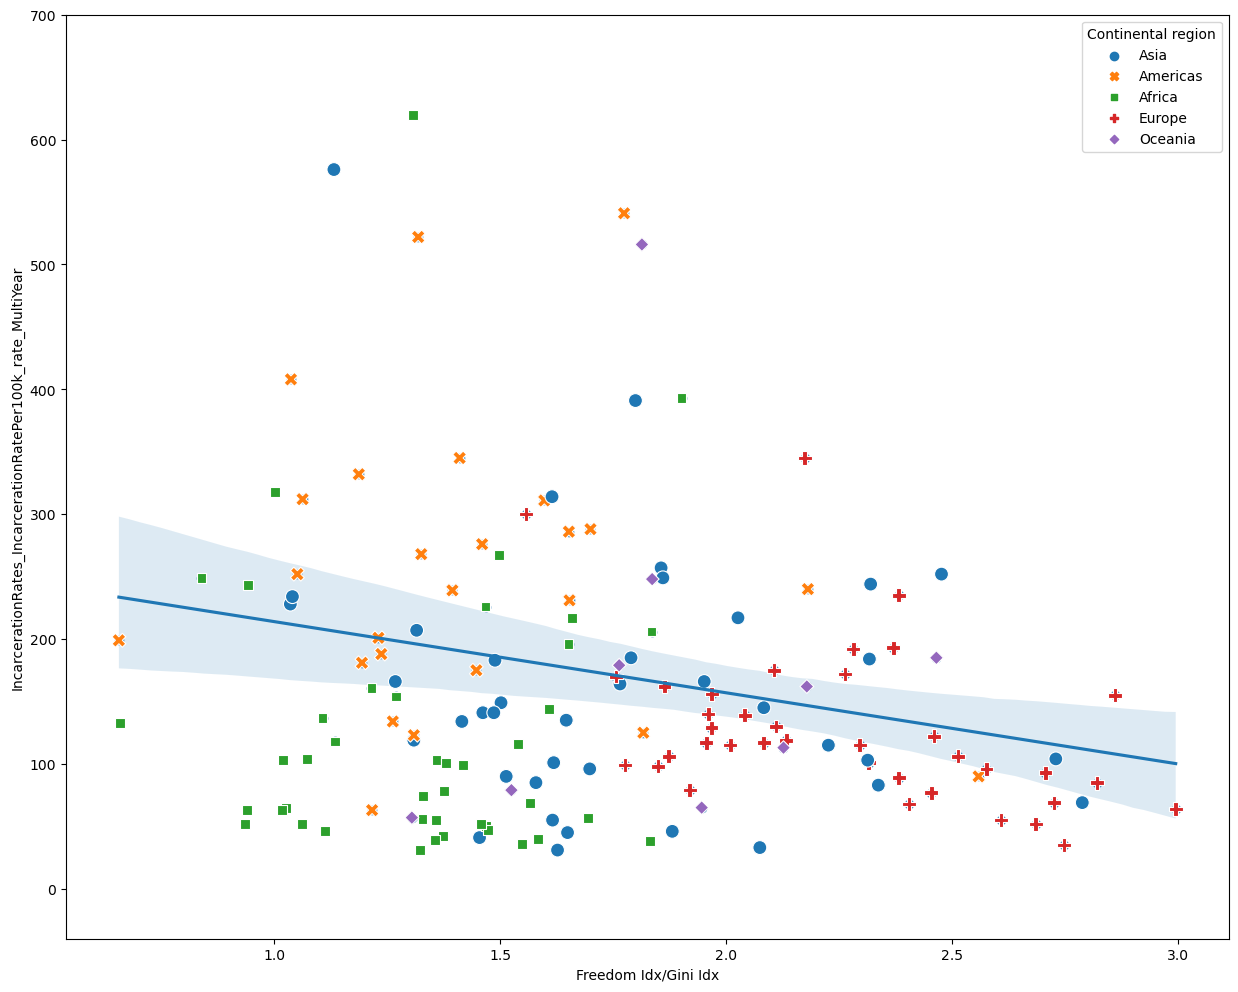

In [27]:
plt.figure(figsize=(15, 12))
ax = plt.gca()

sns.regplot(x="Freedom Idx/Gini Idx", y="IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear", data=free3)
#ax.set_yscale('log')

sns.scatterplot(data=free3, x='Freedom Idx/Gini Idx', y='IncarcerationRates_IncarcerationRatePer100k_rate_MultiYear',
                hue='Continental region', style='Continental region',s=100)

#sns.regplot(x="Freedom Idx/Gini Idx", y="Imprisonment Rate (per 100K people)", data=gini);
plt.ylim(-40,700)
plt.savefig('graphs\\prison_region.png',bbox_inches='tight')

In [ ]:
plt.savefig('graphs\\prison.png',bbox_inches='tight')